In [1]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
image = cv2.imread('/content/ronaldo.jpeg')

In [15]:
def stretch(img,sigma =5,plot_hist=False):
    stretched = np.zeros(img.shape)
    for i in range(img.shape[2]):
        band = img[:,:,i]
        if np.min(band)<0:
            band = band + np.abs(np.min(band))
        band = band / np.max(band)
        band = band * 255
        if plot_hist:
            plt.hist(band.ravel(), bins=256)
            plt.show()
        std = np.std(band)
        mean = np.mean(band)
        max = mean+(sigma*std)
        min = mean-(sigma*std)
        band = (band-min)/(max-min)
        band = band * 255
        band[band>255]=255
        band[band<0]=0
        if plot_hist:
            plt.hist(band.ravel(), bins=256)
            plt.show()
        stretched[:,:,i] = band

    stretched = stretched.astype('int')
    return stretched

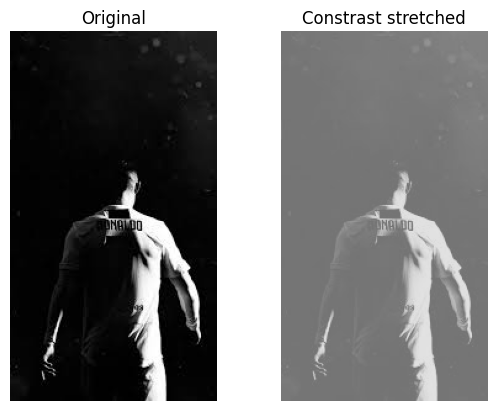

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)
images = [[image, "Original"], [stretch(image), "Constrast stretched"]]
for i, ax in enumerate(axes):
    ax.imshow(images[i][0], cmap="gray")
    ax.set_title(images[i][1])
    ax.axis('off')
plt.show()